In [1]:
%pip install scikit-learn pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Load your dataset
df = pd.read_csv("test.csv")  # Ensure columns: 'crimeadditionalinfo' and 'category'
df = df.dropna(subset=['crimeaditionalinfo', 'category'])

In [5]:
# Encode labels
label2id = {label: i for i, label in enumerate(sorted(df['category'].unique()))}
id2label = {i: label for label, i in label2id.items()}
df['label'] = df['category'].map(label2id)

In [7]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['crimeaditionalinfo'], df['label'], test_size=0.2, random_state=42
)


In [8]:

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
# Train SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

LinearSVC()

In [10]:
# Predict
y_pred = svm_model.predict(X_test_vec)

In [11]:
# Evaluation
target_names = [id2label[i] for i in sorted(id2label)]
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:

                                                      precision    recall  f1-score   support

                               Any Other Cyber Crime       0.35      0.21      0.27       722
Child Pornography CPChild Sexual Abuse Material CSAM       0.62      0.36      0.46        22
                      Crime Against Women & Children       0.00      0.00      0.00         2
                                Cryptocurrency Crime       0.62      0.47      0.54        32
                      Cyber Attack/ Dependent Crimes       0.99      1.00      1.00       245
                                     Cyber Terrorism       0.00      0.00      0.00         9
      Hacking  Damage to computercomputer system etc       0.37      0.16      0.22       118
                            Online Cyber Trafficking       0.00      0.00      0.00        16
                              Online Financial Fraud       0.81      0.94      0.87      3764
                            Online 

c:\Users\Vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vaibh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

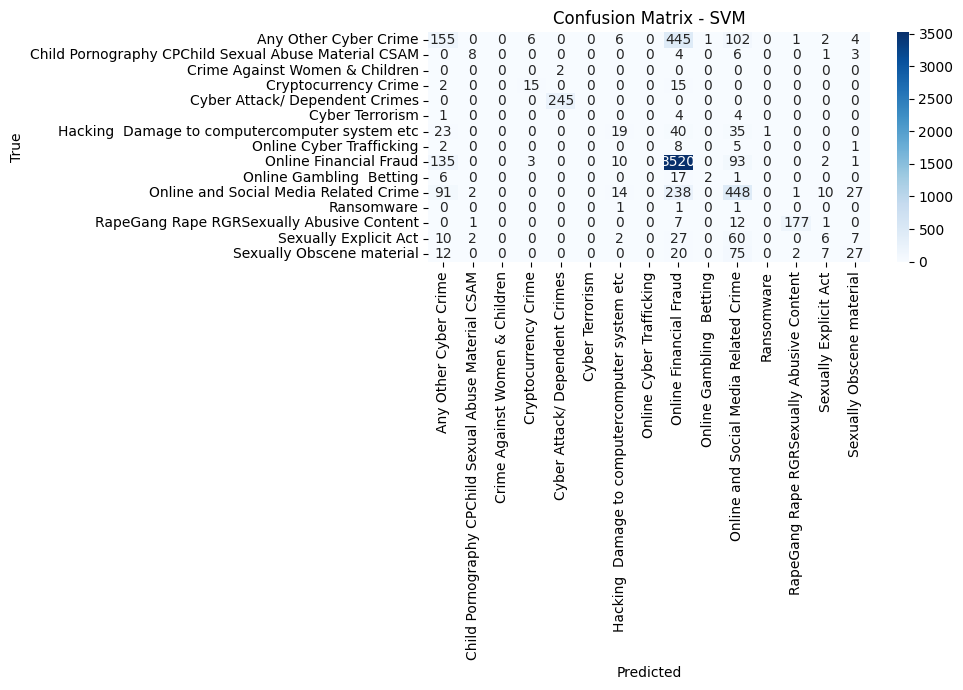

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
